<h1>HIV-1 protease cleavage Data Set</h1>
<p style="text-align: right"><q><strong>Author:</strong> Danilo R. Santos <strong>E-mail: </strong><a href="">danilo_santosrs@hotmail.com</a></q></p>

In [1]:
import pandas as pd

import numpy as np

from sklearn import tree
from sklearn import metrics
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_lc = pd.read_csv('hpcdata_label_coded.csv', engine='c')
df_lc.head()

,cod_seq1,cod_seq2,cod_seq3,cod_seq4,cod_seq5,cod_seq6,cod_seq7,cod_seq8,cod_target
0,0,0,0,0,0,12,0,8,0
1,0,0,0,0,12,0,8,17,0
2,0,0,0,3,9,5,0,14,0
3,0,0,0,12,0,8,17,3,0
4,0,0,0,12,17,0,0,0,0


In [3]:
# Cria uma matriz de dados para plotagem
data_plot = {}

# Separa os dados de treinamento e teste
X = df_lc[['cod_seq1', 'cod_seq2', 'cod_seq3', 'cod_seq4', 'cod_seq5', 'cod_seq6',
           'cod_seq7', 'cod_seq8']]
y = df_lc['cod_target']

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, shuffle=True, stratify=y)

In [6]:
# Testa o modelo de Decision Tree
model_dt = DecisionTreeClassifier(criterion = 'entropy',
                                  splitter='best',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  min_weight_fraction_leaf=0.,
                                  max_features=None,
                                  random_state = 100,
                                  max_leaf_nodes=None,
                                  min_impurity_decrease=0,
                                  #min_impurity_split=0,
                                  class_weight=None,
                                  presort=False)

mdt_fit = model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)
mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_dt, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_dt, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({1:['Decision Tree', mac, mcr, mas, mcm, msm, mss]})

Accuracy: 0.8659585230146687

Classifcation Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1569
           1       0.66      0.71      0.69       408

    accuracy                           0.87      1977
   macro avg       0.79      0.81      0.80      1977
weighted avg       0.87      0.87      0.87      1977


Accuracy Score
0.8659585230146687

Confusion Matrix
[[1421  148]
 [ 117  291]]
[0.82549317 0.77389985 0.75113809 0.7875569  0.91350531 0.90440061
 0.92261002 0.93930197 0.92261002 0.94081942]
Accuracy: 0.87 (+/- 0.14)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [7]:
# Testa o modelo de Random Forest
model_rf = RandomForestClassifier(n_estimators= 160,
                                  criterion='entropy',
                                  max_features = 'auto',
                                  max_depth = None,
                                  min_samples_split = 2,
                                  min_samples_leaf = 1,
                                  min_weight_fraction_leaf = 0,
                                  max_leaf_nodes = None,
                                  min_impurity_decrease = 0,
                                  bootstrap = True,
                                  oob_score = True,
                                  n_jobs = -1,
                                  random_state = 100,
                                  verbose = 1,
                                  warm_start = False,
                                  class_weight = None)
mrf_fit = model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_rf, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_rf, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({2:['Random Forest', mac, mcr, mas, mcm, msm, mss]})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


Accuracy: 0.9089529590288316

Classifcation Report
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      1569
           1       0.92      0.62      0.74       408

    accuracy                           0.91      1977
   macro avg       0.91      0.80      0.84      1977
weighted avg       0.91      0.91      0.90      1977


Accuracy Score
0.9089529590288316

Confusion Matrix
[[1546   23]
 [ 157  251]]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0

[0.80273141 0.80121396 0.80273141 0.81487102 0.94537178 0.98179059
 0.9908953  0.96661608 0.97875569 0.96358118]
Accuracy: 0.90 (+/- 0.16)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.0s finished


In [8]:
# Testa o modelo SVM/SVC
model_svc = SVC(C=1.0,
                kernel='rbf', 
                degree=3, 
                gamma='auto', 
                coef0=0.0, 
                shrinking=True, 
                probability=True, 
                tol=0.001, 
                cache_size=200, 
                class_weight=None, 
                verbose=True, 
                max_iter=-1, 
                decision_function_shape='ovr', 
                random_state=100)

mss_fit = model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)

mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_svc, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

cv_results = cross_validate(model_svc, X, y, scoring=['accuracy', 'brier_score_loss'],
                            cv=10, n_jobs=-1, verbose=1)

data_plot.update({3:['SVM/SVC', mac, mcr, mas, mcm, msm, mss]})

[LibSVM]Accuracy: 0.881638846737481

Classifcation Report
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1569
           1       0.95      0.45      0.61       408

    accuracy                           0.88      1977
   macro avg       0.91      0.72      0.77      1977
weighted avg       0.89      0.88      0.86      1977


Accuracy Score
0.881638846737481

Confusion Matrix
[[1559   10]
 [ 224  184]]
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][0.79514416 0.79817906 0.79969651 0.80728376 0.93930197 0.97572079
 0.98179059 0.94385432 0.98634294 0.94233687]
Accuracy: 0.90 (+/- 0.16)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  1.0min finished


In [9]:
# Testa o modelo Linear SVC
model_lss = LinearSVC(penalty='l2',
                      loss='squared_hinge',
                      dual = False, 
                      tol=0.0001, 
                      C=1.0, 
                      multi_class='ovr', 
                      fit_intercept=True, 
                      intercept_scaling=1, 
                      class_weight = 'balanced', 
                      verbose = 1, 
                      random_state = 100, 
                      max_iter=1000)

mls_fit = model_lss.fit(X_train, y_train)
y_pred = model_lss.predict(X_test)

mac = metrics.accuracy_score(y_test, y_pred)
mcr = classification_report(y_test,y_pred)
mas = accuracy_score(y_test, y_pred)
mcm = confusion_matrix(y_test,y_pred)

print("Accuracy:", mac)

print("\nClassifcation Report")
print(mcr)  

print("\nAccuracy Score")
print(mas)

print("\nConfusion Matrix")
print(mcm)

scores = cross_val_score(model_lss, X, y, cv=10, scoring='accuracy')
print(scores)

msm = scores.mean()
mss = scores.std() * 2
print("Accuracy: %0.2f (+/- %0.2f)" % (msm, mss))

data_plot.update({4:['SVM/LinearSVM', mac, mcr, mas, mcm, msm, mss]})

[LibLinear]Accuracy: 0.5356600910470409

Classifcation Report
              precision    recall  f1-score   support

           0       0.80      0.55      0.65      1569
           1       0.22      0.48      0.30       408

    accuracy                           0.54      1977
   macro avg       0.51      0.52      0.48      1977
weighted avg       0.68      0.54      0.58      1977


Accuracy Score
0.5356600910470409

Confusion Matrix
[[862 707]
 [211 197]]
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][0.5660091  0.53566009 0.49468892 0.54324734 0.40364188 0.64643399
 0.51593323 0.46737481 0.55235205 0.52807284]
Accuracy: 0.53 (+/- 0.12)


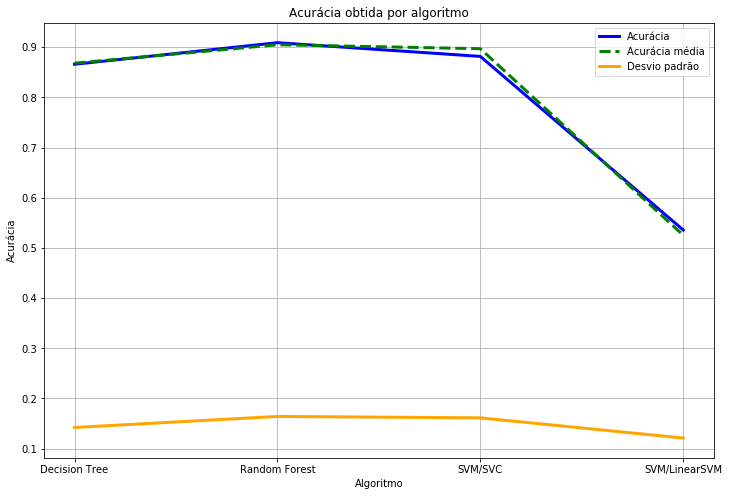

In [10]:
algoritmos = []
accuracy = []
accuracy_mean = []
accuracy_std = []
for k, v in data_plot.items():
    algoritmos.append(v[0])
    accuracy.append(v[1])
    accuracy_mean.append(v[5])
    accuracy_std.append(v[6])
    
plt.figure(figsize=(12,8))
plt.plot(algoritmos, accuracy, color='blue', linewidth=3.0, label='Acurácia');
plt.plot(algoritmos, accuracy_mean, 'k--', color='green', linewidth=3.0, label='Acurácia média');
plt.plot(algoritmos, accuracy_std, color='orange', linewidth=3.0, label='Desvio padrão');
plt.title('Acurácia obtida por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Acurácia')
plt.grid(True)
plt.legend();

['Decision Tree', 'Random Forest', 'SVM/SVC', 'SVM/LinearSVM']
[1421, 1546, 1559, 862]
[291, 251, 184, 197]
[117, 157, 224, 211]
[291, 251, 184, 197]
[0.2637342242019302, 0.28693392724573125, 0.28934669636228655, 0.15998515219005197]
[0.3152762730227519, 0.27193932827735645, 0.19934994582881907, 0.2134344528710726]
[0.16502115655853314, 0.22143864598025387, 0.3159379407616361, 0.29760225669957685]
[0.3142762730227519, 0.27093932827735645, 0.19834994582881907, 0.2124344528710726]


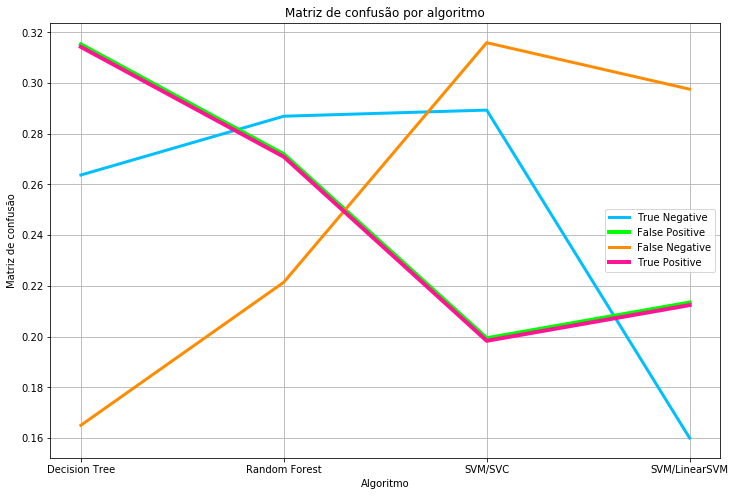

In [26]:
algoritmos = []
tn = []
fp = []
fn = []
tp = []
for k, v in data_plot.items():
    algoritmos.append(v[0])
    tn.append(v[4][0][0])
    fp.append(v[4][1][1])
    fn.append(v[4][1][0])
    tp.append(v[4][1][1])

print(algoritmos)
print(tn)
print(fp)
print(fn)
print(tp)

def scalable_data_one(data):
    np_data = np.array(data)
    data_mean = np_data.mean()
    return [(item/data_mean) for item in data]

def scalable_data(data):
    np_data = np.array(data)
    data_sum = np_data.sum()
    return [(item/data_sum) for item in data]

def scalable_data_two(data):
    np_data = np.array(data)
    data_sum = np_data.sum()
    return [((item/data_sum) - 0.001) for item in data]

tn = scalable_data(tn)
fp = scalable_data(fp)
fn = scalable_data(fn)
tp = scalable_data_two(tp)

print(tn)
print(fp)
print(fn)
print(tp)

plt.figure(figsize=(12,8))
plt.plot(algoritmos, tn, color='#00BFFF', linewidth=3.0, label='True Negative')
plt.plot(algoritmos, fp, color='#00FF00', linewidth=4.0, label='False Positive')
plt.plot(algoritmos, fn, color='#FF8C00', linewidth=3.0, label='False Negative')
plt.plot(algoritmos, tp, color='#FF1493', linewidth=4.0, label='True Positive')
plt.title('Matriz de confusão por algoritmo')
plt.xlabel('Algoritmo')
plt.ylabel('Matriz de confusão')
plt.grid(True)
plt.legend();